In [1]:
client_id = 'G299Qnny7iHAUA'
client_secret = 'UcPFHX-hNNn5wC-FLs7FRj_CwuY'

In [2]:
import praw
reddit = praw.Reddit(client_id=client_id, client_secret=client_secret,
                     user_agent='PRAW',
                     username='sw1sh')

In [3]:
subreddit = reddit.subreddit('AdviceAnimals')

In [4]:
post = subreddit.top().next()

In [5]:
post.title

'Sometimes staying out of touch with pop culture has its benefits.'

In [21]:
from PIL import Image
import pytesseract

import io
from urllib import request

In [8]:
def post_img_url(post):
    #return sorted(post.preview['images'][0]['resolutions'], key=lambda info: info['height'])[-1]['url']
    return post.url

def post_img(post):
    response = request.urlopen(post_img_url(post))
    return Image.open(io.BytesIO(response.read()))

In [18]:
def darken_background(img, limit=255):
    img = img.convert('L') # Create lookup table of rgb values
    img = img.point(lambda x: 0 if x<limit else 255, '1') # Change each point
    return img

def ignore_alpha(img):
    if len(img.split()) == 4:
        r,g,b,a = img.split()
        img = Image.merge("RGB", (r,g,b))
    return img

In [14]:
post.url

'https://i.imgur.com/1V72C4q.jpg'

In [11]:
image = post_img(post)

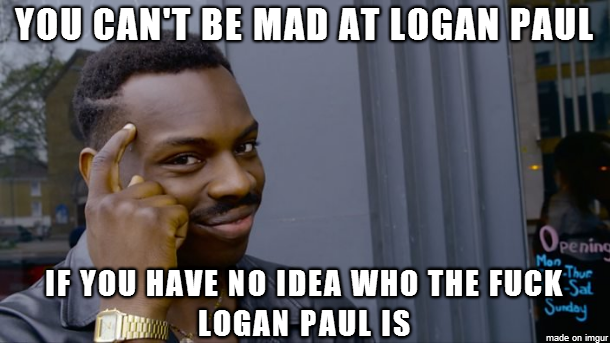

In [12]:
image

In [28]:
pytesseract.image_to_string(darken_background(image))

"YOU CAN'T BE MAD AT LOGAN PAUL\n\nIF YOU HAVE NO IDEA WHO THE FUCK\nLOGAN PAUL IS"